In [1]:
# mounting drive. Remove when testing/running locally
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/nanoscience_mast/deep-learn/hws/hw1/

Mounted at /content/drive/
/content/drive/MyDrive/nanoscience_mast/deep-learn/hws/hw1


# Problem 2

In [2]:
# Setup:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import warnings

warnings.filterwarnings("ignore")

# Fix random seed for reproducibility
np.random.seed(42)

## Problem C
For each $N \in \{20, 25, 30, 35, . . . , 100\}$:
  1. Perform 5-fold cross-validation on the first N points in the dataset(setting aside the other points), computing the both the training and validation error for each fold.

    * Use the mean squared error loss as the error function.
    * Use NumPy’s polyfit method to perform the degree-d polynomial regression and NumPy’s polyval method to help compute the errors. (See the example code and NumPy documentation for details.)
    * When partitioning your data into folds, although in practice you should randomize your partitions, for the purposes of this set, simply divide the data into K contiguous blocks.
  1. Compute the average of the training and validation errors from the 5 folds.

In [3]:
def mean_square_error(y_true, y_model):
  """
  Calculate the mean square error for several data points.

  Inputs:
      y_true: The actual data point.
      y_model: The point predicted by the model.

  Output:
      mean square error between the true data and model prediction
  """
  return np.sum((y_true - y_model)**2) / len(y_true)

def loss_func(x, y_true, coeffs):
  """
  Calculate the loss function for a polynomial with known coefficients.

  Inputs:
      x: The points to be evaluated
      y_true: The actual data point
      coeffs: The coefficients of the model polynomial.

  Output:
      mean square error between the true data and model polynomial prediction
  """
  y_model = np.polyval(coeffs, x)
  return mean_square_error(y_true, y_model)

def errors(x,y, deg, train_index, test_index):
  """
  Calculate the train and validation error for a polynomial of deg degree
  polynomial.

  Inputs:
      x: All independent variable points in the data
      y: All corresponding dependent points in the data
      deg: the degree of the polynomial
      train_index: the indeces of the training data
      test_index: the indeces of the test data

  Output:
      The train and validation error for the polynomial for the given indeces
      and data.
  """
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  coeffs = np.polyfit(x_train, y_train, deg)
  train_err = loss_func(x_train, y_train, coeffs)
  validation_err = loss_func(x_test, y_test, coeffs)

  return train_err, validation_err

# reading data
x, y = np.loadtxt(fname = "data/bv_data.csv", delimiter=",", skiprows=1).T

# parameters of problem
degs_poly = np.array([1, 2, 6, 12])
num_points =  np.arange(start=20, stop=101, step=5)


num_folds = 5
kf = KFold(n_splits=num_folds)
training_set_size = num_points * ( 1 - 1/num_folds)

# determining errors
training_errors = np.zeros((len(degs_poly), len(num_points)))
validation_errors = np.zeros((len(degs_poly), len(num_points)))
for i, deg in enumerate(degs_poly):
  for j, n in enumerate(num_points):
    x_spliced = x[:n]
    y_spliced = y[:n]

    train_err = 0
    validation_err = 0
    for (train_index, test_index) in kf.split(x_spliced):
      errs  = errors(x_spliced,y_spliced, deg, train_index, test_index)
      train_err += errs[0]
      validation_err += errs[1]
    # obtaining training and validation error averaged over folds
    training_errors[i,j] += train_err / num_folds
    validation_errors[i,j] += validation_err / num_folds

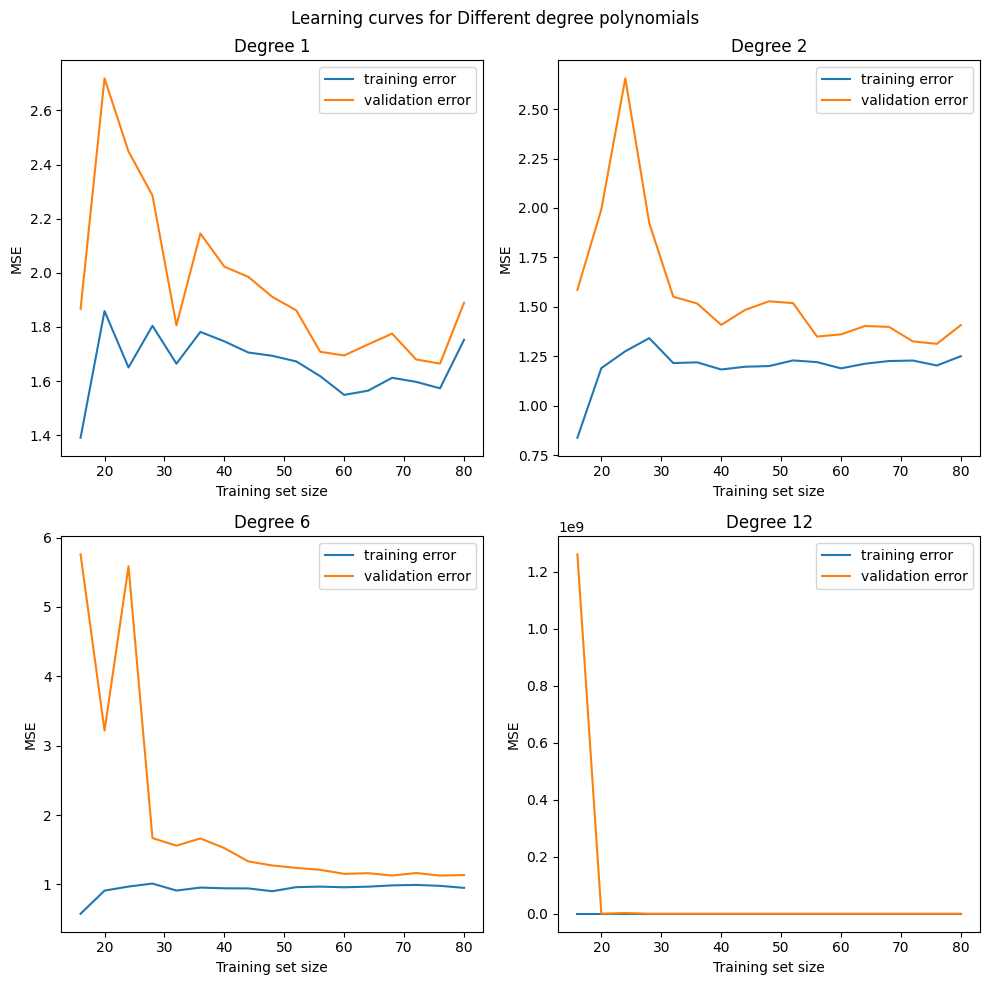

In [4]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10), layout = "tight")
axs = axs.ravel()

for i, (deg, ax) in enumerate(zip(degs_poly, axs)):
  ax.plot(training_set_size, training_errors[i], label="training error")
  ax.plot(training_set_size, validation_errors[i], label="validation error")

  ax.set_title(f"Degree {deg}")
  ax.set_ylabel("MSE")
  ax.set_xlabel("Training set size")
  ax.legend()

plt.suptitle("Learning curves for Different degree polynomials")
plt.show()

## Problem D
The polynomial regression model with degree 1 has the highest bias. This is as it performs poorly on both the traning and test data. Moreover, the degree to which it poorly performs is relatively the same as the number of points increases.

## Problem E
The polynomial regression model with degree 12 has the highest varience. This is as it performs poorly on the test data for a small sized training set, but performs extremely well for larger training sets.

## Problem F
The learning curve of the quadratic model tells us that after 75 training points, there is not much of an improvement. This is likely due to the bias within the model.

## Problem G
The training error is generally lower than the validation error as the model fine-tunes the coefficients to the training data. The test data will not have this bias, and thus will, in this case, typically have a higher error.

## Problem H
I would expect the quadratic model to perform best on some unseen data drawn from the same distribution as the training data. This is as it seems to be the model with the best balance between low variance and low bias.